<a href="https://colab.research.google.com/github/marwamhz/Prediction-of-Product-Sales/blob/main/Prediction_of_product_sales_Part5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of product sales
- Author : Marwa Mehrez

##Project Overview


##Load and Inspect Data

In [1]:
# Mount google drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
# import pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# save the file path and load data as df_sales
fpath = '/content/drive/MyDrive/CodingDojo/Project1/sales_predictions_2023.csv'
df_sales = pd.read_csv(fpath)

In [4]:
# Display the first 5 rows of the DataFrame
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Display the summary of the DataFrame
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Clean Data

### 1) How many rows and columns?

In [6]:
# determine the number of rows and coloumns
df_sales.shape

(8523, 12)

### 2) What are the datatypes of each variable?

In [7]:
# determine the datatype of each variable
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### 3) Are there duplicates? If so, drop any duplicates.

In [8]:
# save a filter called "duplicates" that identifies duplicated rows
duplicates = df_sales.duplicated()
# calculate the sum of duplicated rows to determine the number of duplicated rows
duplicates.sum()

0

- Check if there is duplicated rows with small discrapancy

In [9]:
# check nunique value in the DataFrame
df_sales.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
# set Item_Identifier and Outlet_Identifier as an index
df_sales = df_sales.set_index(['Item_Identifier','Outlet_Identifier'])
df_sales.head()

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,Outlet_Identifier,,,,,,,,,,
FDA15,OUT049,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,OUT018,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,OUT049,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,OUT010,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,OUT013,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
# check if there is duplicates in the new DataFrame
duplicates_rows = df_sales.duplicated()
# calculate the sum of duplicated rows to determine the number of duplicated rows
duplicates_rows.sum()

0

### 4) Identify missing values.

In [12]:
# save a filter called "nulls" that identifies null values for all columns
nulls = df_sales.isna().sum()
nulls

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### 5) Address the missing values by using a placeholder value.

- The columns Item_Weight and Outlet_Size contain missing values. First, we will check the datatype of each of these columns

In [13]:
#  check the datatype for Item_Weight column
df_sales['Item_Weight'].dtype

dtype('float64')

In [14]:
#  check the datatype for Outlet_Size column
df_sales['Outlet_Size'].dtype

dtype('O')


 - The Item_Weight column datatype is a float so we will fill the missig value with either the mean or the median.

In [15]:
# check statistics for Item_Weight column
df_sales['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [16]:
# We will fill null values in Item_Weight with the median
# set a variable for Item weight median
Item_Weight_median = df_sales['Item_Weight'].median()
# Fill null values in Item_Weight with the median
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(Item_Weight_median)


  - The Outlet_Size column datatype is a string so we will fill the missig value with a categorical placeholder called Missing.

In [17]:
# Fill null values in Outlet_Size with 'Missing'
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna('Missing')

### 6) Confirm that there are no missing values after addressing them.

In [18]:
# confirm no missing values using pandas
df_sales.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [19]:
# save a list of object columns
object_col = df_sales.select_dtypes('object').columns
object_col

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [20]:
# Find the nunique values for the object columns
df_sales[object_col].nunique()

Item_Fat_Content         5
Item_Type               16
Outlet_Size              4
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64

In [21]:
# obtain the value counts for all string columns
for col in object_col:
  print(f'The value counts for {col}')
  print(df_sales[col].value_counts())
  # add an empty line to increase readibility
  print('\n')

The value counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


The value counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


The value counts for Outlet_Size
Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64


The value counts for Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


The value counts for Outlet_Type
Superm

- It seems that Item_Fat_Content column has inconsistent values that need to be addressed

In [22]:
# review the value counts for Item_Fat_Content column
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
# Standardize  the values in the Item_Fat_Content column
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})
# check the value counts for Item_Fat_Content column
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [24]:
# save a list of num columns
num_col = df_sales.select_dtypes('number').columns
num_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [25]:
# obtain the summary statistics for each numerical columns
for name in num_col:
  print(f'The summary statistics for {name} is')
  print(df_sales[name].describe())
  # add an empty line to increase readibility
  print('\n')

The summary statistics for Item_Weight is
count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64


The summary statistics for Item_Visibility is
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


The summary statistics for Item_MRP is
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


The summary statistics for Outlet_Establishment_Year is
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: floa

##Exploratory Data Analysis

### 1) Make histograms to view the distributions of numerical features in the dataset and boxplots to view their statistical summaries.

In [26]:
# define a funtion to plot a histogram and a boxplot for numerical columns
def numeric_plot(df,col) :
  # add temporarily the ggplot style
  with plt.style.context('ggplot'):
    # make a figure and axes sharing the same y-axis
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5,5), sharex=True)
    # use seaborn to plot a histogram
    sns.histplot(data=df, x=col, color='steelblue', ax=axes[0])
    # use seaborn to plot a boxplot
    sns.boxplot(data=df_sales, x=col, color='steelblue', ax=axes[1])
    # set a variable called mean for column and show the mean on the graph
    mean_col = df[col].mean()
    axes[1].axvline(mean_col, color='y', linestyle='dotted', linewidth=2, label="Mean")
    # set title
    axes[0].set_title(f'Explore data for {col}')
    # add legend
    axes[1].legend(loc=(1.02, 0))

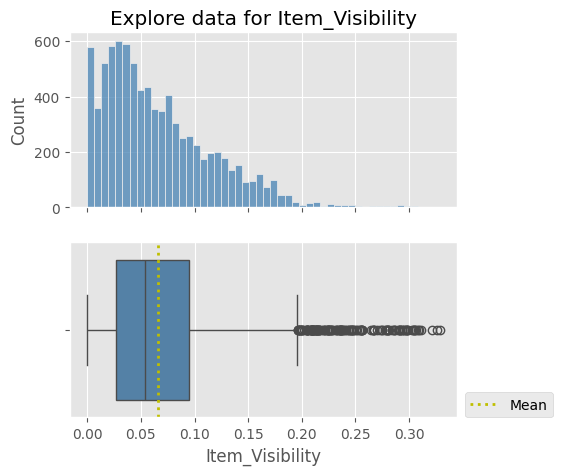

In [27]:
# Plotting a histogram and a boxplot for Item_Visibility
numeric_plot(df_sales, 'Item_Visibility')

- The median and mean are different. This means that there is items that are more visible than others.
- The boxplot shows that there is outliners.

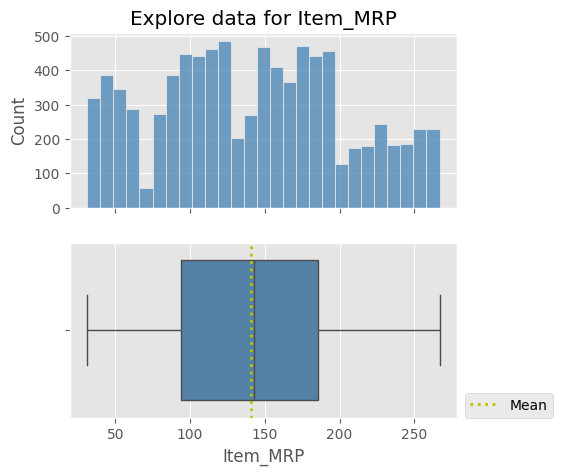

In [28]:
# Plotting a histogram and a boxplot for Item_MRP
numeric_plot(df_sales, 'Item_MRP')

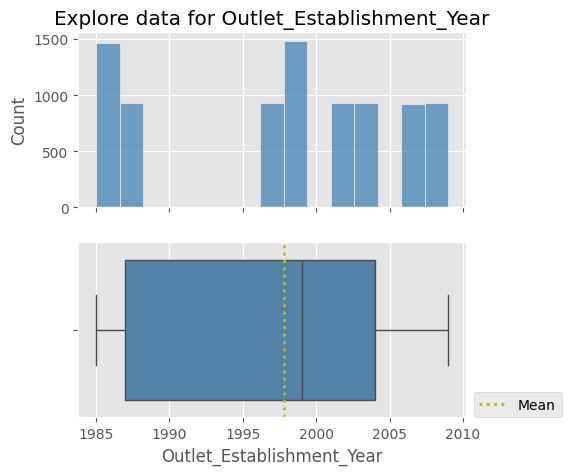

In [29]:
# Plotting a histogram and a boxplot for Outlet_Establishment_Year
numeric_plot(df_sales, 'Outlet_Establishment_Year')

- The majority of store were establiched after 1995.

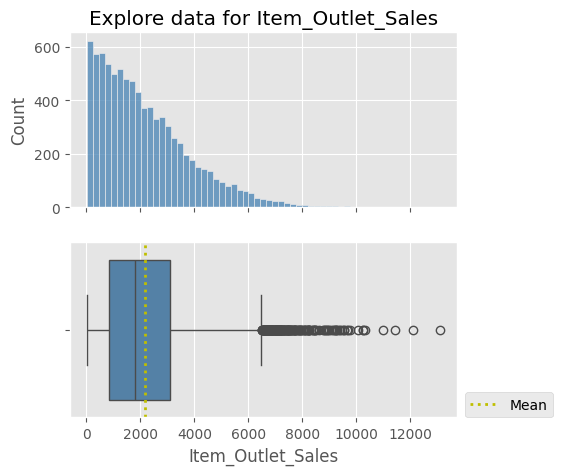

In [30]:
# Plotting a histogram and a boxplot for Item_Outlet_Sales
numeric_plot(df_sales, 'Item_Outlet_Sales')

- These figures show that approximatively half of sales of a product in a particular store are under 2000.



### 2) Make countplots to view the frequency of each class of categorial features in the dataset.

In [31]:
# define a funtion to plot a histogram and a boxplot for numerical columns
def cat_plot(df,col) :
  # use seaborn to plot a countplot
  val_counts = df[col].value_counts()
  ax = sns.countplot(data=df, x=col, order= val_counts.index, color='steelblue')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
  # set title and labels
  ax.set_title(f'Frequency of {col}', fontsize=12, fontweight='bold')

<ipython-input-31-a22e5fe58cdf>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


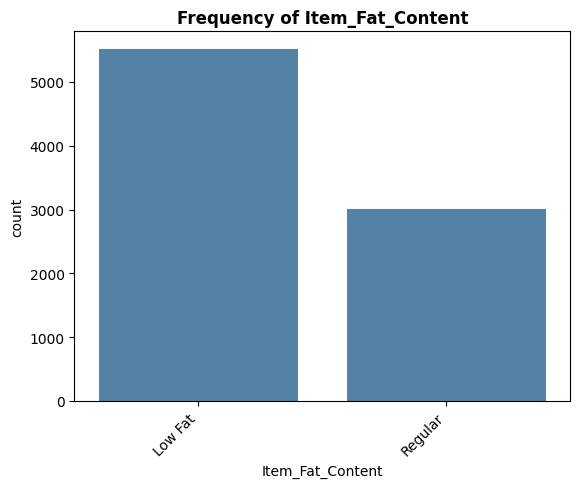

In [32]:
# Plotting a countplot for Item_Fat_Content
cat_plot(df_sales, 'Item_Fat_Content')

- The majority of Item are low fat

<ipython-input-31-a22e5fe58cdf>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


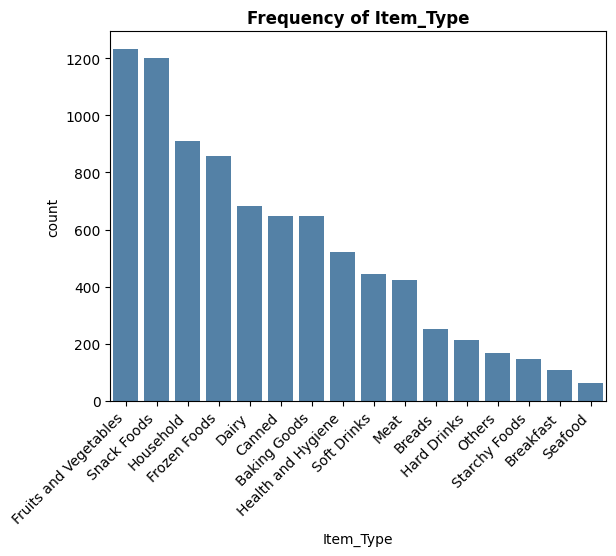

In [33]:
# Plotting a countplot for Item_Type
cat_plot(df_sales, 'Item_Type')

- The two category (to which the product belongs) that have the highest frequency are:
 - Fruits and Vegetables
 - Snack Foods

<ipython-input-31-a22e5fe58cdf>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


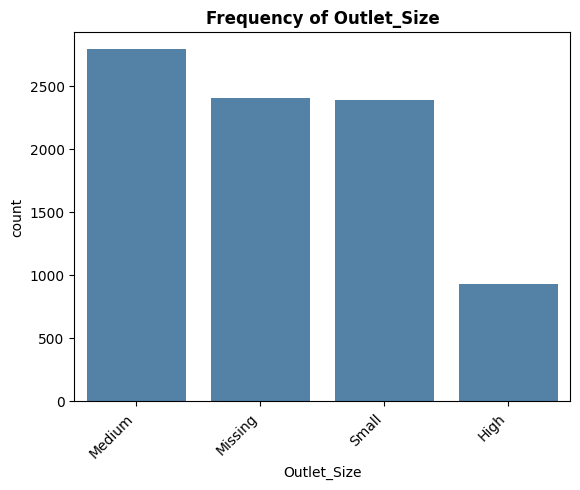

In [34]:
# Plotting a countplot for Outlet_Size
cat_plot(df_sales, 'Outlet_Size')

- Without considering the missing data, the size of most stores is medium.

<ipython-input-31-a22e5fe58cdf>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


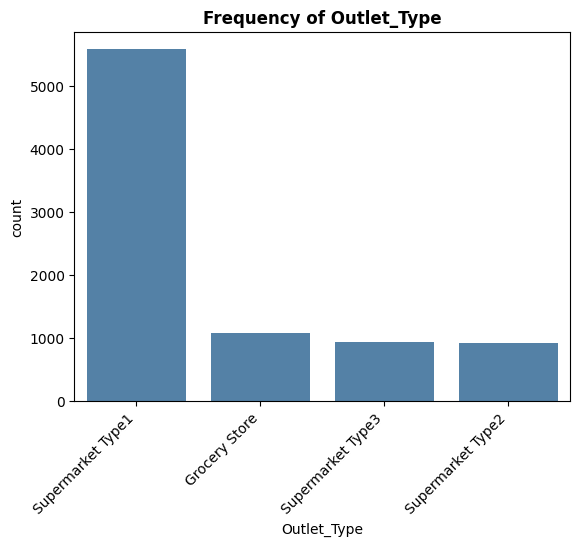

In [35]:
# Plotting a countplot for Outlet_Type
cat_plot(df_sales, 'Outlet_Type')

- This figure shows that most of the stores are supermarket Type1.

### 3) Make Heatmap to view the correlation between features.

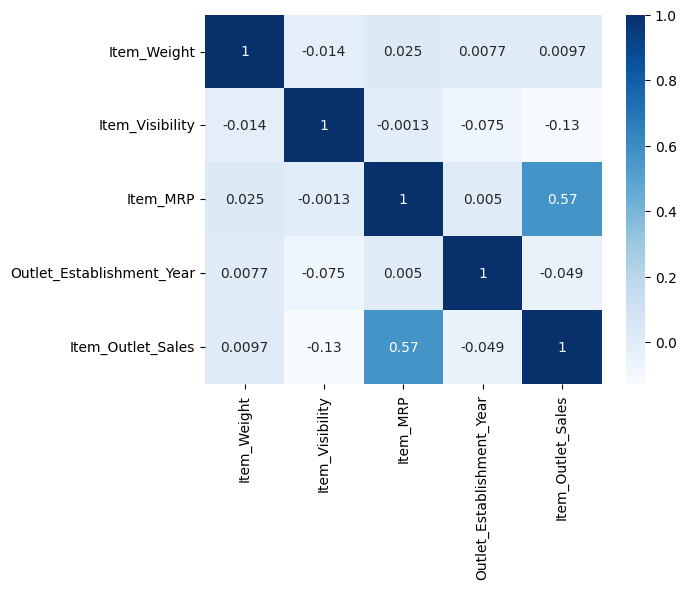

In [36]:
# set a variable for correlation
corr = df_sales.corr(numeric_only=True)
corr.round(2)
# Make a heatmap
sns.heatmap(corr, cmap='Blues',annot=True);

- The heat map shows that there is a positive correlation between Item_outlet_Sales and Item_MRP. This correlation is moderate.

##Feature Inspection

For feature inspection, we want to be fully aware of any null values present so that we can make informed choices about data preparation for machine learning. Therefore, before we proceed,  **we will Remove the placeholders you added when cleaning data and replace them with null values.** This will allow our functions to report the presence and frequency of null values as part of our EDA.​
  - For outlet size column, we will replace the place holder "Missing" that we added
  - For Item weight column, we previously added the median to fillin missing value so we will replace this column by the original column from the data.

In [37]:
# filter rows with Outlet_Size = Missing
filter_missing = df_sales['Outlet_Size'] == "Missing"
# replace "Missing" in the outlet size column by a null value
df_sales.loc[filter_missing,'Outlet_Size'] = np.nan
# confirm that the column contains missing data
df_sales['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [38]:
# load the original data as a new DataFrame called df2
df2 = pd.read_csv(fpath)
# set Item_Identifier and Outlet_Identifier as index for df2 as we previously did for df_sales
df2 = df2.set_index(['Item_Identifier','Outlet_Identifier'])
# replace Item weight column in df_sales by the Item weight column in df2
df_sales['Item_Weight'] = df2['Item_Weight']
# confirm that Item weight column in df_sales contains null values
df_sales['Item_Weight'].isna().sum()

1463

### EDA Functions



#### Univariate EDA Functions

In [39]:

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


#### Multivariate Feature vs. Target Functions.

In [40]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='charges',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, hue=x, order=order, hue_order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='charges',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

### Define your target column:
  - Item_Outlet_Sales


### Inspecting Each Feature

##### Item_Weight

- Feature Name: Weight of product
  

In [41]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df_sales[feature].dtype

dtype('float64')

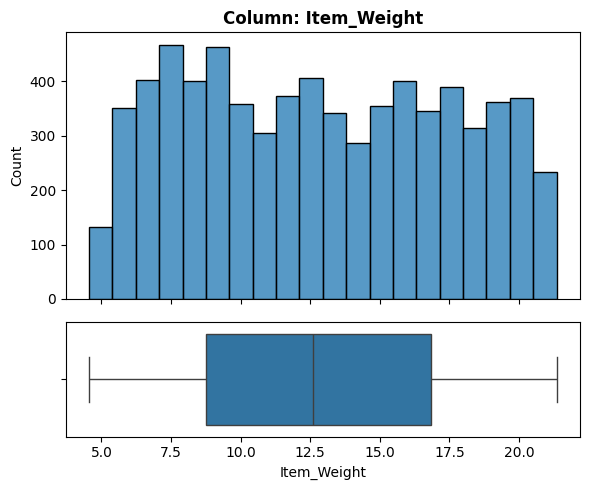

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [42]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 null values with 17.17%
  - impute with mean oe median

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



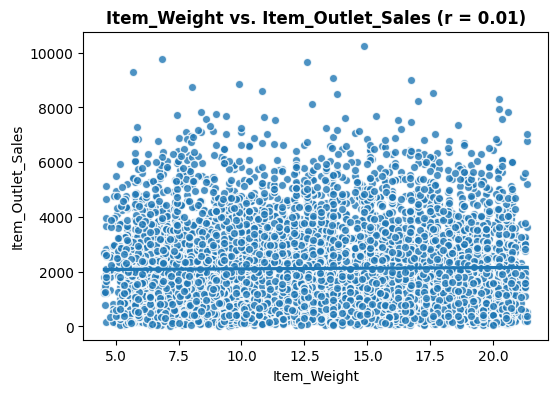

In [43]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, feature, y='Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `No`
  - Does this feature appear to be a predictor of the target?
    - `No, there is no correlation between the target and the feature (r=0.01)`

___

##### Item_Fat_Content

- Feature Name: Whether the product is :
  - Low Fat  
  - Regular
  

In [44]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df_sales[feature].dtype

dtype('O')

<ipython-input-39-9db5c58463e2>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


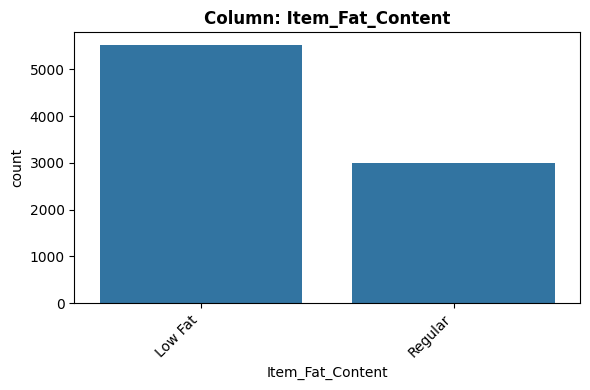

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [45]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_sales, feature, fillna = True);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - There are 2 unique values. (low)

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



<ipython-input-40-ca8208e6aeca>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


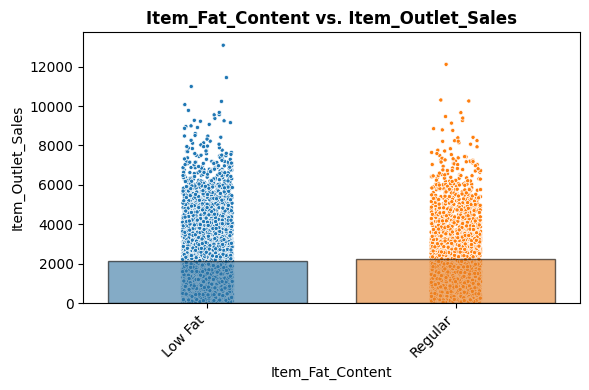

In [46]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, feature, y='Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `yes.`
  - Does this feature appear to be a predictor of the target?
    - `No `

___

##### Item_Visibility

- Feature Name: The percentage of total display area of all products in a store allocated to the particular product

  

In [47]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df_sales[feature].dtype

dtype('float64')

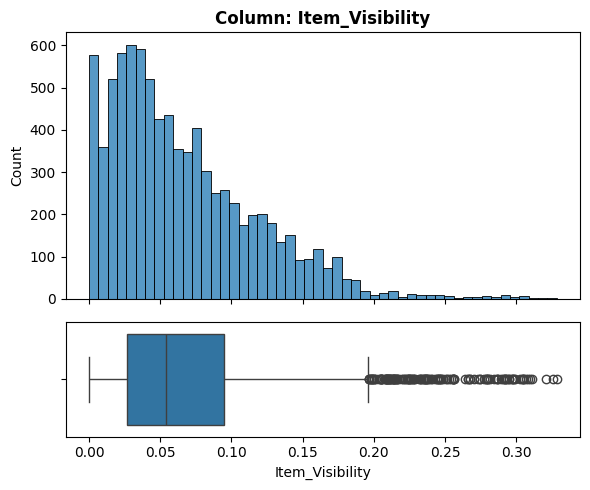

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [48]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Not applicable (numeric feature).

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



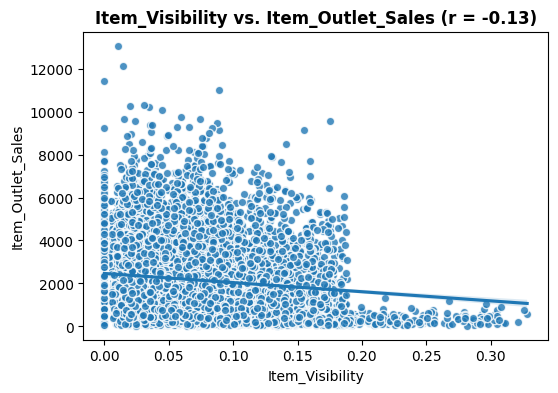

In [49]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, feature, y='Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `yes, I would expect that product with higher visibility would be sold more`
  - Does this feature appear to be a predictor of the target?
    - `No`

___

##### Item_Type

- Feature Name: The category to which the product belongs


In [50]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Type"
df_sales[feature].dtype

dtype('O')

<ipython-input-39-9db5c58463e2>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


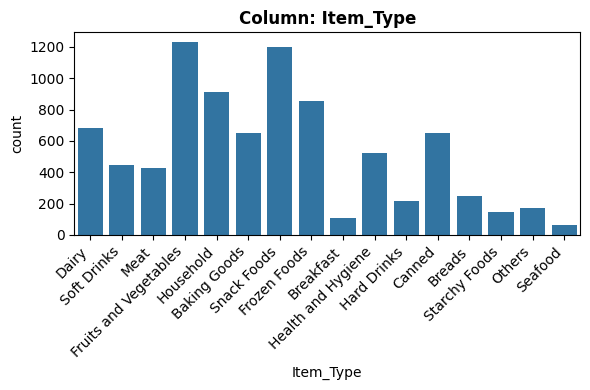

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [51]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - High, 16 categories.

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



<ipython-input-40-ca8208e6aeca>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


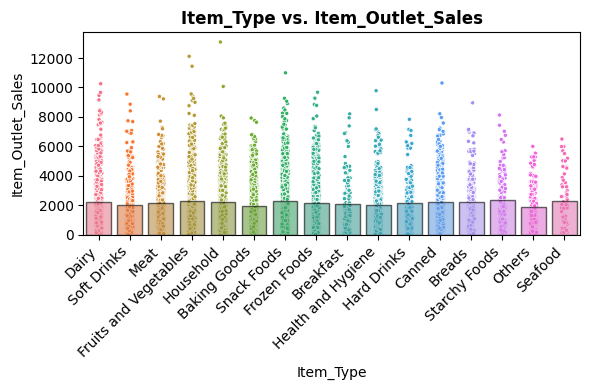

In [52]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, feature, y='Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `yes`
  - Does this feature appear to be a predictor of the target?
    - `Yes it does, there is variability between the groups, even though some have similar means.`

___

##### Item_MRP

- Feature Name: Maximum Retail Price (list price) of the product
  

In [53]:
# # Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df_sales[feature].dtype

dtype('float64')

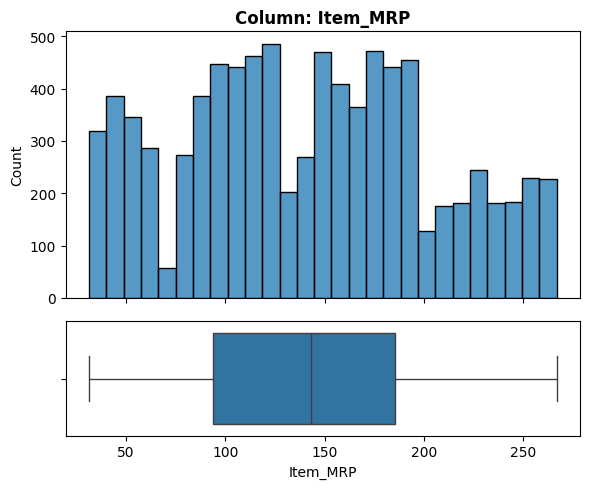

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [54]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Not applicable (numeric feature).

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



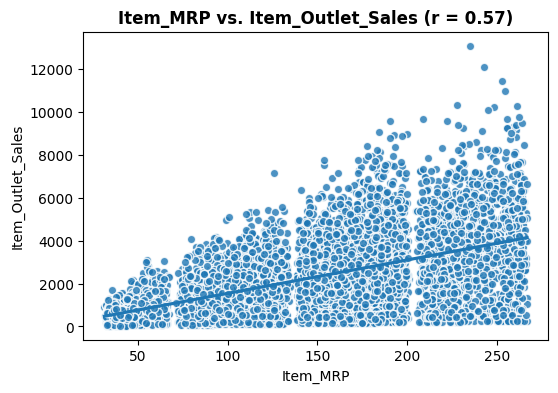

In [55]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, feature, y='Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `yes`
  - Does this feature appear to be a predictor of the target?
    - `yes, there is a positive correlation between this feature and the target`

___

##### Outlet_Establishment_Year

- Feature Name: The year in which store was established
  

In [56]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df_sales[feature].dtype

dtype('int64')

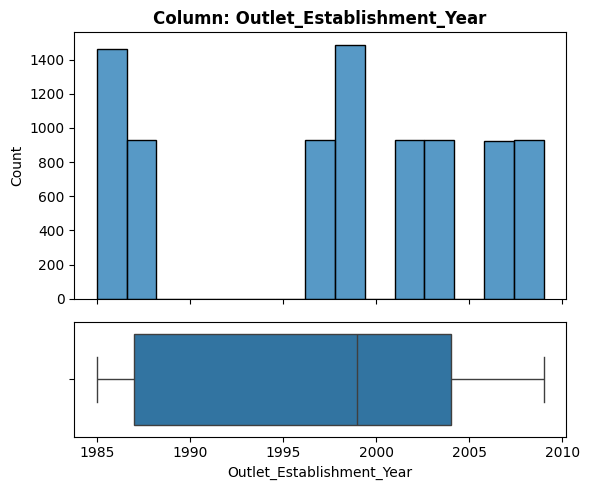

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [57]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - Not applicable (numeric feature).

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no


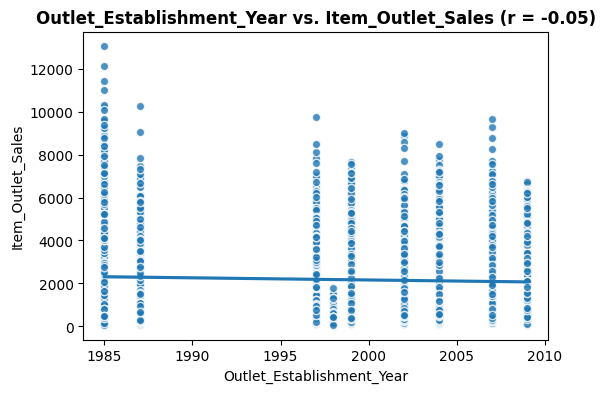

In [58]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, feature, y='Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `No`
  - Does this feature appear to be a predictor of the target?
    - `No as expected`

___

##### Outlet_Size

- Feature Name: The size of the store in terms of ground area covered
  

In [59]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df_sales[feature].dtype

dtype('O')

<ipython-input-39-9db5c58463e2>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


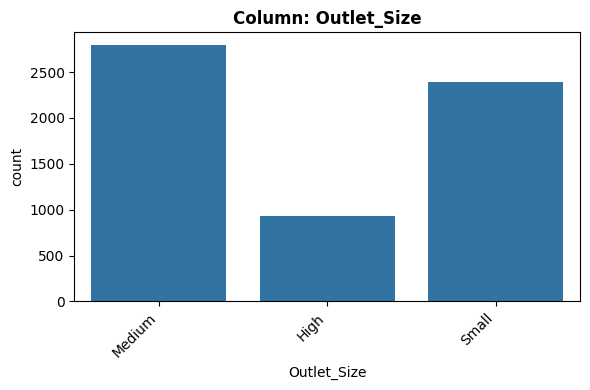

- NaN's Found: 2410 (28.28%)
- Unique Values: 3
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [60]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_sales, feature, fillna=False);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 null values (percentage = 28.28%).
  - replace missing value with a placeholder 'mussing'

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - there is 3 categories (low)

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



<ipython-input-40-ca8208e6aeca>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


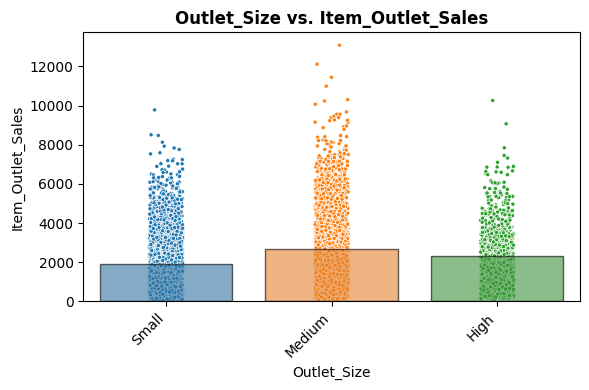

In [61]:
# Run the appropriate feature vs. target function (based on dtype)
order_outlet_size = ['Small', 'Medium', 'High']
plot_categorical_vs_target(df_sales, feature, y='Item_Outlet_Sales', fillna = False, order=order_outlet_size );

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `yes`
  - Does this feature appear to be a predictor of the target?
    - `Yes it does, there is variability between the groups`

___

##### Outlet_Location_Type

- Feature Name: The type of area in which the store is located
  

In [62]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df_sales[feature].dtype

dtype('O')

<ipython-input-39-9db5c58463e2>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


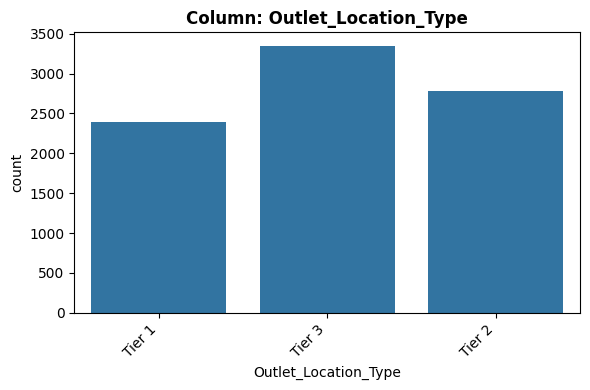

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [63]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - 3 categories (low)

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



<ipython-input-40-ca8208e6aeca>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


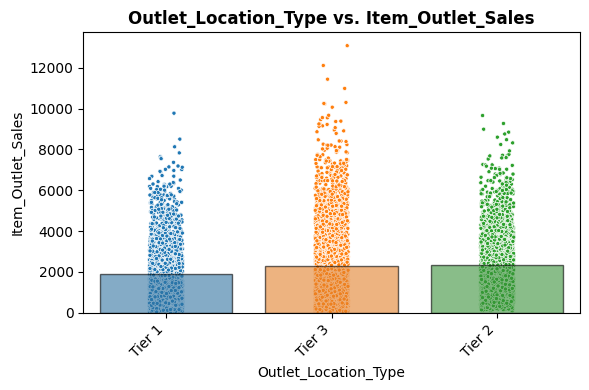

In [64]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, feature, y='Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `yes it is possible`
  - Does this feature appear to be a predictor of the target?
    - `Yes it does, there is variability between the groups`

___

##### Outlet_Type

- Feature Name: Whether the outlet is a grocery store or some sort of supermarket
  

In [65]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df_sales[feature].dtype

dtype('O')

<ipython-input-39-9db5c58463e2>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


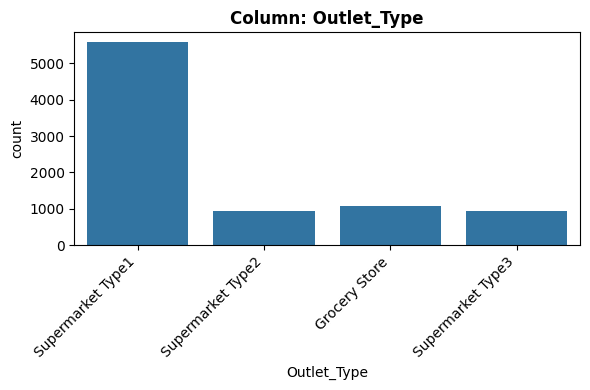

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [66]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - 4 categories <10 => not high

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no


<ipython-input-40-ca8208e6aeca>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


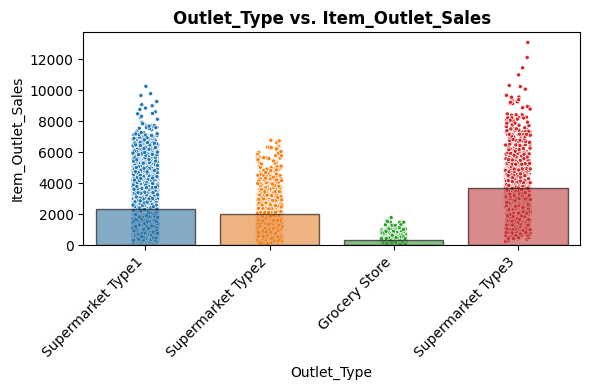

In [67]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, feature, y='Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `yes it is possible`
  - Does this feature appear to be a predictor of the target?
    - `Yes, it seems that being a grocery store is associated with lower item outlet sales.`

___

##### Item_Outlet_Sales (target)

- Feature Name: Sales of the product in the particular store.
  

In [68]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Outlet_Sales"
df_sales[feature].dtype

dtype('float64')

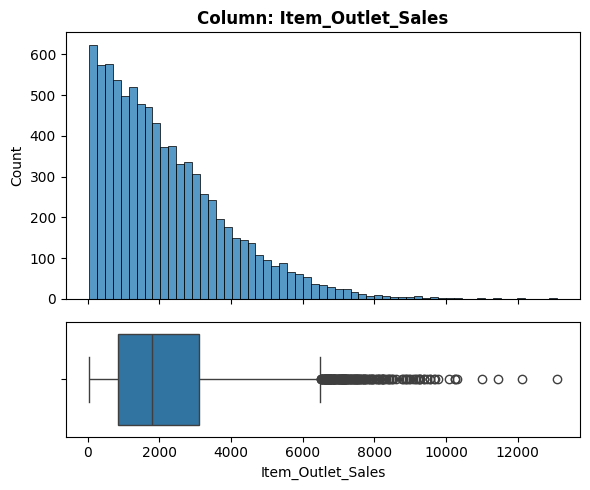

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [69]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Not applicable (numeric feature).

5. Would we know this BEFORE the target is determined?
  - Yes, its our target!

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, its our target!



## Preprocesing for Machine Learning (Part 5)

For Part 5, you will go back to your original, uncleaned, sales prediction dataset with the goal of preventing data leakage.

You should load a fresh version of the original data set here using pd.read_csv() and start your cleaning process over to ensure there is no data leakage!

- Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)
- Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
- Hint: We recommend you drop the "Item_Identifier" feature because it has very high cardinality.
- Perform a train test split
- Create a preprocessing object to prepare the dataset for Machine Learning
- Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

In [70]:
# Modeling & preprocessing imports
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')


In [71]:
# reload the original data as a new DataFrame called df3
df3 = pd.read_csv(fpath)
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [72]:
# Count the sum of duplicated rows
df3.duplicated().sum()

0

- There is no duplicated rows that need to be adressed

In [74]:
# drop the "Item_Identifier" feature
df3 = df3.drop(columns = 'Item_Identifier')

-- There is no numerical column with impossible values. For categorical columns, only Item_Fat_Content column has inconsistent values that need to be addressed

In [76]:
# review the value counts for Item_Fat_Content column
df3['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [77]:
# Standardize  the values in the Item_Fat_Content column
df3['Item_Fat_Content'] = df3['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})
# check the value counts for Item_Fat_Content column
df3['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [78]:
# Check the data types
df3.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

-- Check for null values

In [79]:
# check for null values
nulls = df3.isna().sum()
nulls

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Separate data into the feature matrix (X) and the target vector (y)

In [80]:
# Assign the target column to y
y = df3['Item_Outlet_Sales']
# Assign the features to X
X = df3.drop(columns = 'Item_Outlet_Sales')

### Train/test split the data

In [81]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Create a ColumnTransformer to preprocess the data.

1- Create numerical Pipeline and Define numerical Tuple for ColumnTransformer

Our numeric pipeline will:
- Impute missing values with the median.
- Scale the data.

In [82]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple


('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

2 - Create ordinal Pipeline and Define ordinal Tuple for ColumnTransformer

Our ordinal pipeline will:
- Impute missing values with "NA".
- Encode the features ordinally.
- Scale the encoded features.

In [89]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA
# Save list of column names
ord_cols = ['Outlet_Size']
# Create imputer for ordinal data
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal outlet size Columms
outlet_size_order = ['NA','Small' , 'Medium', 'High']
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [outlet_size_order]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
## Making an ord_pipe
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
# Making a ord_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['NA', 'Small', 'Medium',
                                              'High']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size'])

3 - Create categorical (nominal) Pipeline and Define categorical(nominal) Tuple for ColumnTransformer

Our categorical pipeline will only One-Hot-Encode the categories for each feature.


In [90]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns = ord_cols).columns
# Create a OneHotEncoder for one-hot encoding the categorical columns
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with encoder
ohe_pipe = make_pipeline(ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple


('categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

4- Use the tuples to create a ColumnTransformer

In [91]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

### Fit the ColumnTransformer on your training data.

In [92]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinale...
                                                  OrdinalEncoder(categories=[['NA',
                                                                              'Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

### Transform the training and test data

In [93]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# View the processed training data
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,1.327849,0.748125,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.566644,-1.291052,0.603369,1.327849,0.748125,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.121028,1.813319,0.244541,0.136187,0.748125,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.158464,-1.004931,-0.952591,0.732018,-0.264370,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,0.493686,-1.276865,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [94]:
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_test_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,0.341372,-0.776646,-0.998816,-1.293807,1.760619,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,-1.169135,0.100317,-1.585194,-0.102145,-0.264370,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,0.388798,-0.482994,-1.595784,0.136187,0.748125,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,-0.049889,-0.415440,0.506592,-1.532139,0.748125,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
856,-0.632039,-1.047426,0.886725,0.732018,-0.264370,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
